# flood-prediction

Use the "Run" button to execute the code.

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/playground-series-s4e5'

In [ ]:
od.download(dataset_url)

Skipping, found downloaded files in "./playground-series-s4e5" (use force=True to force download)


In [ ]:
data_dir = 'playground-series-s4e5'

In [ ]:
flood_preds = pd.read_csv(data_dir + '/train.csv')

In [ ]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [ ]:
flood_preds

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,4,3,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,5,5,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,4,5,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,4,6,6,8,5,3,4,6,7,6,4,0.495


In [ ]:
flood_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
flood_preds.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


## Exploratory Analysis & Visualizations

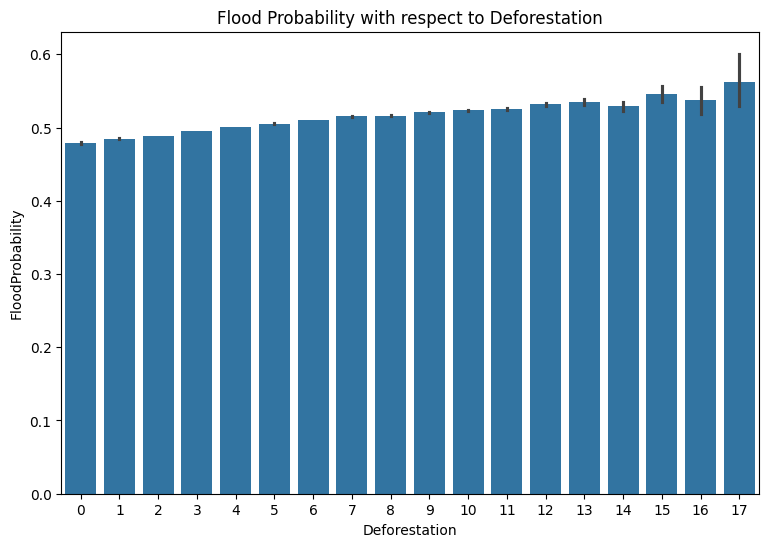

In [ ]:
plt.figure(figsize=(9, 6))
plt.title('Flood Probability with respect to Deforestation')
sns.barplot(x= 'Deforestation', y= 'FloodProbability', data= flood_preds);

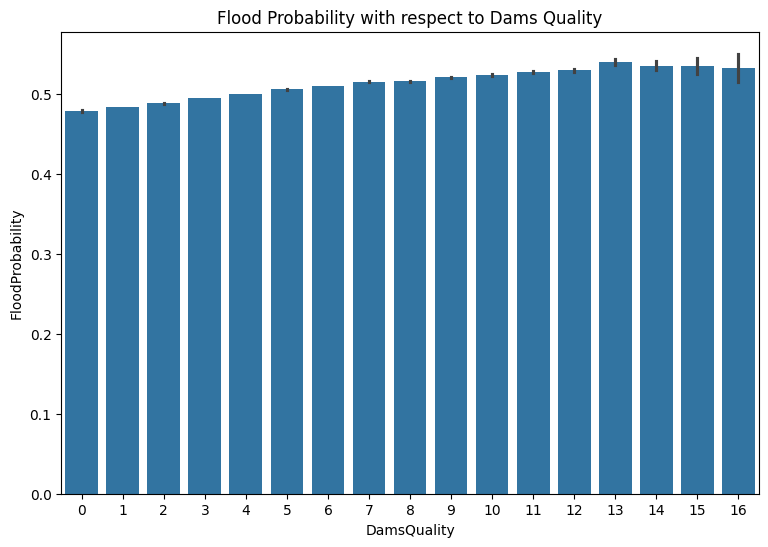

In [ ]:
plt.figure(figsize=(9, 6))
plt.title('Flood Probability with respect to Dams Quality')
sns.barplot(x=flood_preds.DamsQuality, y= flood_preds.FloodProbability);

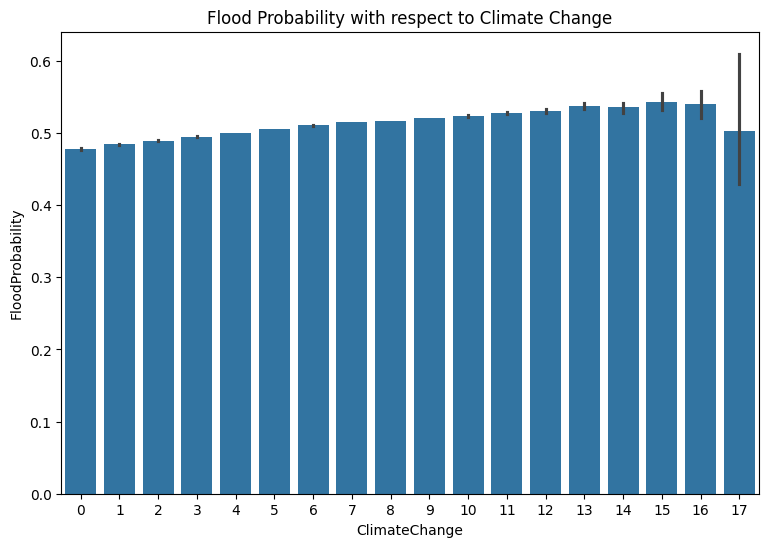

In [ ]:
plt.figure(figsize=(9, 6))
plt.title('Flood Probability with respect to Climate Change')
sns.barplot(x=flood_preds.ClimateChange, y= flood_preds.FloodProbability);

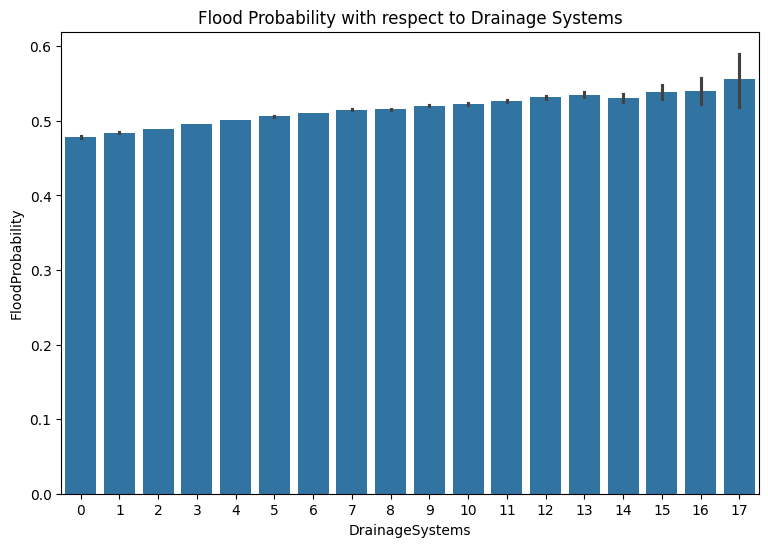

In [ ]:
plt.figure(figsize=(9, 6))
plt.title('Flood Probability with respect to Drainage Systems')
sns.barplot(x=flood_preds.DrainageSystems, y= flood_preds.FloodProbability);

### There is similar trend b/w the factors and flood probability as the value of factor goes high, the probability of floods also increases. Also the value 17 of the factors have less confidence of interval.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
input_cols = flood_preds.columns.tolist()[1:-1]
target_col = 'FloodProbability'

In [ ]:
scaler.fit(flood_preds[input_cols])

MinMaxScaler()

In [ ]:
flood_preds[input_cols] = scaler.transform(flood_preds[input_cols])

In [ ]:
input_cols

['MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors']

In [ ]:
inputs_df = flood_preds[input_cols].copy()
targets = flood_preds[target_col].copy()

In [ ]:
inputs_df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0.3125,0.444444,0.3125,0.470588,0.352941,0.235294,0.2500,0.1875,0.1875,0.222222,0.1250,0.294118,0.176471,0.1875,0.3125,0.235294,0.388889,0.263158,0.4375,0.1875
1,0.3750,0.388889,0.2500,0.235294,0.470588,0.470588,0.1875,0.3125,0.2500,0.333333,0.5625,0.411765,0.117647,0.0000,0.1875,0.294118,0.166667,0.157895,0.2500,0.1875
2,0.3750,0.277778,0.3750,0.411765,0.176471,0.411765,0.0625,0.3125,0.2500,0.277778,0.3750,0.411765,0.176471,0.4375,0.3125,0.352941,0.444444,0.105263,0.1875,0.1875
3,0.1875,0.222222,0.3750,0.294118,0.235294,0.470588,0.2500,0.4375,0.3750,0.444444,0.3125,0.117647,0.235294,0.4375,0.2500,0.235294,0.333333,0.263158,0.4375,0.3125
4,0.3125,0.166667,0.1250,0.352941,0.235294,0.235294,0.1875,0.1875,0.1875,0.166667,0.3125,0.117647,0.117647,0.3750,0.3750,0.235294,0.055556,0.105263,0.1875,0.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,0.1875,0.166667,0.2500,0.588235,0.235294,0.294118,0.3125,0.4375,0.6250,0.222222,0.1875,0.411765,0.470588,0.4375,0.1250,0.117647,0.055556,0.210526,0.3750,0.2500
1117953,0.1250,0.111111,0.2500,0.176471,0.529412,0.294118,0.5000,0.0625,0.1875,0.277778,0.3125,0.529412,0.235294,0.2500,0.1875,0.411765,0.222222,0.473684,0.2500,0.3125
1117954,0.4375,0.166667,0.5625,0.235294,0.352941,0.294118,0.5625,0.0625,0.1875,0.222222,0.3125,0.294118,0.294118,0.3125,0.3125,0.352941,0.277778,0.263158,0.1250,0.2500
1117955,0.4375,0.166667,0.1875,0.411765,0.294118,0.117647,0.1875,0.2500,0.3750,0.222222,0.3750,0.352941,0.470588,0.3125,0.1875,0.235294,0.333333,0.368421,0.3750,0.2500


In [ ]:
targets

0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, train_targets, val_targets = train_test_split(inputs_df, targets, test_size= 0.25, random_state= 42)

In [ ]:
X_train

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
744684,0.5000,0.277778,0.0000,0.117647,0.235294,0.117647,0.4375,0.1875,0.2500,0.444444,0.1250,0.294118,0.176471,0.6875,0.3125,0.352941,0.388889,0.157895,0.3125,0.2500
403603,0.3750,0.111111,0.1875,0.235294,0.470588,0.470588,0.3125,0.1875,0.3750,0.166667,0.3125,0.352941,0.294118,0.5000,0.3125,0.235294,0.444444,0.157895,0.5000,0.0625
451607,0.2500,0.111111,0.4375,0.529412,0.235294,0.176471,0.1875,0.1875,0.1875,0.277778,0.3750,0.470588,0.352941,0.4375,0.1250,0.058824,0.166667,0.315789,0.4375,0.3750
914017,0.2500,0.166667,0.2500,0.294118,0.352941,0.352941,0.2500,0.3750,0.3750,0.222222,0.3750,0.352941,0.411765,0.5625,0.3125,0.176471,0.277778,0.315789,0.3750,0.1875
69997,0.3750,0.277778,0.2500,0.294118,0.176471,0.176471,0.2500,0.3125,0.3750,0.277778,0.4375,0.294118,0.176471,0.5000,0.0625,0.117647,0.333333,0.315789,0.1875,0.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.2500,0.388889,0.3125,0.235294,0.235294,0.294118,0.1875,0.5000,0.2500,0.055556,0.3125,0.117647,0.411765,0.1875,0.4375,0.352941,0.111111,0.210526,0.3125,0.3125
259178,0.1875,0.222222,0.3750,0.294118,0.294118,0.411765,0.3750,0.5000,0.1250,0.444444,0.1875,0.411765,0.176471,0.4375,0.5625,0.411765,0.166667,0.105263,0.1875,0.5000
131932,0.3125,0.222222,0.0625,0.117647,0.176471,0.235294,0.3750,0.5000,0.1875,0.166667,0.1875,0.235294,0.294118,0.1875,0.2500,0.294118,0.166667,0.315789,0.4375,0.4375
671155,0.3750,0.555556,0.2500,0.352941,0.176471,0.352941,0.1875,0.1875,0.3125,0.166667,0.3125,0.176471,0.352941,0.3750,0.3125,0.294118,0.222222,0.210526,0.3125,0.3125


In [ ]:
X_val


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
1105809,0.4375,0.277778,0.5000,0.235294,0.470588,0.235294,0.5000,0.2500,0.1875,0.388889,0.1875,0.294118,0.411765,0.2500,0.4375,0.117647,0.166667,0.315789,0.4375,0.1250
442591,0.3125,0.166667,0.6250,0.529412,0.529412,0.352941,0.2500,0.1250,0.2500,0.500000,0.1250,0.176471,0.352941,0.4375,0.4375,0.352941,0.222222,0.105263,0.5625,0.3750
5434,0.3125,0.333333,0.1250,0.352941,0.176471,0.235294,0.2500,0.2500,0.2500,0.055556,0.5000,0.352941,0.411765,0.3750,0.3125,0.352941,0.388889,0.368421,0.3750,0.3125
82966,0.4375,0.166667,0.3750,0.235294,0.235294,0.294118,0.5000,0.3125,0.3750,0.277778,0.3125,0.294118,0.294118,0.1875,0.5000,0.411765,0.222222,0.315789,0.3125,0.2500
584893,0.3750,0.277778,0.4375,0.411765,0.294118,0.294118,0.3125,0.3750,0.1875,0.388889,0.3125,0.235294,0.235294,0.3750,0.5625,0.294118,0.333333,0.210526,0.3125,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936617,0.1875,0.277778,0.3125,0.294118,0.352941,0.294118,0.3750,0.3125,0.3750,0.222222,0.2500,0.294118,0.352941,0.6875,0.3125,0.176471,0.388889,0.210526,0.4375,0.3125
704265,0.3125,0.333333,0.4375,0.294118,0.117647,0.529412,0.5000,0.5625,0.3750,0.444444,0.2500,0.294118,0.352941,0.3125,0.5625,0.411765,0.277778,0.210526,0.3750,0.3750
757455,0.3750,0.277778,0.1250,0.235294,0.235294,0.411765,0.2500,0.1250,0.3125,0.388889,0.3750,0.294118,0.529412,0.3750,0.6250,0.470588,0.222222,0.210526,0.2500,0.1875
753690,0.1875,0.222222,0.1875,0.294118,0.294118,0.294118,0.2500,0.3750,0.3750,0.555556,0.5625,0.176471,0.294118,0.2500,0.3125,0.529412,0.444444,0.315789,0.1250,0.3125


## 1st Model: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, train_targets)

LinearRegression()

In [ ]:
lr_preds = lr.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(train_targets, lr_preds)

0.8450306764524693

In [ ]:
r2_score(val_targets, lr.predict(X_val))

0.8447057763250224

In [ ]:
submission_df = pd.read_csv(data_dir + '/sample_submission.csv')

In [ ]:
test_df = pd.read_csv(data_dir + '/test.csv')

In [ ]:
test_df[input_cols] = scaler.transform(test_df[input_cols])

In [ ]:
def model_predict(inputs, model):
  inputs = inputs[input_cols].copy()
  predictions = model.predict(inputs)
  return predictions

In [ ]:
submission_df

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
...,...,...
745300,1863257,0.5
745301,1863258,0.5
745302,1863259,0.5
745303,1863260,0.5


In [ ]:
submission_df['FloodProbability'] = model_predict(test_df, lr)

In [ ]:
submission_df

,id,FloodProbability
0,1117957,0.573636
1,1117958,0.455295
2,1117959,0.454758
3,1117960,0.466187
4,1117961,0.466098
...,...,...
745300,1863257,0.477202
745301,1863258,0.449422
745302,1863259,0.624309
745303,1863260,0.550936


In [ ]:
submission_df.to_csv('lR.csv', index=None)

## 2nd Model: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rr = Ridge(random_state= 42)

In [ ]:
rr.fit(X_train, train_targets)

Ridge(random_state=42)

In [ ]:
r2_score(train_targets, rr.predict(X_train))

0.8450306683900235

In [ ]:
r2_score(val_targets, rr.predict(X_val))

0.844705792204778

### It is same as linear regression model, so not useful

### It is observed that linear models are performing better on this dataset instead of trees or random forests.

## 3rd model: XGBRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XgbR = XGBRegressor(random_state=42, Booster= 'gbtree')

In [ ]:
XgbR.fit(X_train, train_targets)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:20:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(Booster='gbtree', base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
r2_score(train_targets, XgbR.predict(X_train))

0.8190644791808288

In [ ]:
r2_score(val_targets, XgbR.predict(X_val))

0.8091720124705921

In [ ]:
def test_params_xgbr(**params):
    model = XGBRegressor(random_state=42, Booster= 'gblinear', **params).fit(X_train, train_targets)
    train_r2_score = r2_score(train_targets, model.predict(X_train),)
    val_r2_score = r2_score(val_targets, model.predict(X_val))
    return train_r2_score, val_r2_score

In [ ]:
test_params_xgbr(learning_rate= 0.5)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:20:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)


(0.8091384823896126, 0.7976772131353251)

In [ ]:
test_params_xgbr(learning_rate= 0.2)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:20:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)


(0.8240499208521004, 0.8142212915993415)

In [ ]:
test_params_xgbr(gamma= 0.53)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)


(0.7960249908440845, 0.7902937312923983)

In [ ]:
test_params_xgbr(gamma= 0.15)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)


(0.8081039151313903, 0.8025665686072861)

In [ ]:
test_params_xgbr(learning_rate= 0.2, eval_metric= r2_score)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)


(0.8240499208521004, 0.8142212915993415)

In [ ]:
best_xgb = XGBRegressor(random_state= 42, Booster= 'gblinear', learning_rate= 0.2, eval_metric= r2_score).fit(X_train, train_targets)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:02:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
submission_df['FloodProbability'] = model_predict(test_df, best_xgb)

In [ ]:
submission_df.to_csv('XGBRegressor.csv', index= None)

## 4th Model: Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
voting_reg = VotingRegressor(estimators=[
    ('lr', lr),
    ('rr', rr),
    ('xgb', best_xgb)
])

In [ ]:
voting_reg.fit(X_train, train_targets)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:41:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rr', Ridge(random_state=42)),
                            ('xgb',
                             XGBRegressor(Booster='gblinear', base_score=None,
                                          booster=None, callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=<function r2_score at 0x7eddfe0c1b40>,
                                          featu...one, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.2, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...))])

In [ ]:
r2_score(train_targets, voting_reg.predict(X_train))

0.844683962147539

In [ ]:
r2_score(val_targets, voting_reg.predict(X_val))

0.8417378316120994

## 5th Model: LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_reg = lgb.LGBMRegressor(random_state= 42, boosting_type= 'gbdt', learning_rate= 0.25, n_estimators= 100, max_depth= 7, num_leaves= 32)

In [ ]:
lgb_reg.fit(X_train, train_targets)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.457345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 838467, number of used features: 20
[LightGBM] [Info] Start training from score 0.504490


LGBMRegressor(learning_rate=0.25, max_depth=7, num_leaves=32, random_state=42)

In [ ]:
r2_score(train_targets, lgb_reg.predict(X_train))

0.8225222663983438

In [ ]:
r2_score(val_targets, lgb_reg.predict(X_val))

0.8170070751175919

## Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
base_models = [
    ('lr', lr),
    ('rr', rr),
    ('xgbreg', best_xgb),
    ('lgbm', lgb_reg)
]

meta_model = LinearRegression()

stacking_reg = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=4)

In [ ]:
stacking_reg.fit(X_train, train_targets)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:22:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 838467, number of used features: 20
[LightGBM] [Info] Start training from score 0.504490


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:23:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:23:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:23:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:23:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Booster" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 628850, number of used features: 20
[LightGBM] [Info] Start training from score 0.504516
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 628850, number of used features: 20
[LightGBM] [Info] Start training from score 0.504465
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.124328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set:

StackingRegressor(cv=4,
                  estimators=[('lr', LinearRegression()),
                              ('rr', Ridge(random_state=42)),
                              ('xgbreg',
                               XGBRegressor(Booster='gblinear', base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=<function r2_score at 0x7eddfe0c1...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('lgbm',
                               LGBMRegressor(learning_rate=0.25, max_depth=7,
                                             num_leaves=32, random_state=42))],
                  final_estimator=LinearRegression())

In [ ]:
r2_score(train_targets, stacking_reg.predict(X_train))

0.8454611805400944

In [ ]:
r2_score(val_targets, stacking_reg.predict(X_val))

0.8447782681417038

In [ ]:
submission_df['FloodProbability'] = model_predict(test_df, stacking_reg)

In [ ]:
submission_df.to_csv('stackingRegressor.csv', index=None)